In [ ]:
!pip install -q git+https://github.com/huggingface/transformers.git

In [ ]:
! rm -r unilm
! git clone -b remove_torch_save https://github.com/NielsRogge/unilm.git
! cd unilm/layoutlm
! pip install unilm/layoutlm
     

In [ ]:
! rm -r transformers
! git clone https://github.com/huggingface/transformers.git
! cd transformers
! pip install ./transformers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install -q pyyaml==5.1
# workaround: install old version of pytorch since detectron2 hasn't released packages for pytorch 1.9 (issue: https://github.com/facebookresearch/detectron2/issues/3158)
!pip install -q torch==1.8.0+cu101 torchvision==0.9.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html

# install detectron2 that matches pytorch 1.8
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
#!pip install -q detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.8/index.html
!python -m pip install -q 'git+https://github.com/facebookresearch/detectron2.git'

In [ ]:
! sudo apt install tesseract-ocr
! pip install -q pytesseract
     

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 34 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 0s (25.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/Fron

In [ ]:
import os
from PIL import Image

def read_img(file_name):
    new_file_name = os.path.splitext(file_name)[0] + '.jpg' 
    image_path_folder = '/content/drive/MyDrive/dataset_2/dataset/train/images'
    file_path = os.path.join(image_path_folder, new_file_name)
    image = Image.open(file_path)
    return image

def test_img(file_name):
    new_file_name = os.path.splitext(file_name)[0] + '.jpg' 
    image_path_folder = '/content/drive/MyDrive/dataset_2/dataset/val/images'
    file_path = os.path.join(image_path_folder, new_file_name)
    image = Image.open(file_path)
    return image


In [ ]:
import os

def read_tsv(file_name):
     data_list = []
     directory = '/content/drive/MyDrive/dataset_2/dataset/train/boxes_transcripts_labels'
     file_path = os.path.join(directory, file_name)
     with open(file_path, "r") as file:
        for line in file:
            # Process each line of the file
            line_data = line.strip().split(',')
            data_list.append(line_data)
     return data_list

def val_tsv(file_name):
     data_list = []
     directory = '/content/drive/MyDrive/dataset_2/dataset/val/boxes_transcripts'
     file_path = os.path.join(directory, file_name)
     with open(file_path, "r") as file:
        for line in file:
            # Process each line of the file
            line_data = line.strip().split(',')
            data_list.append(line_data)
     return data_list


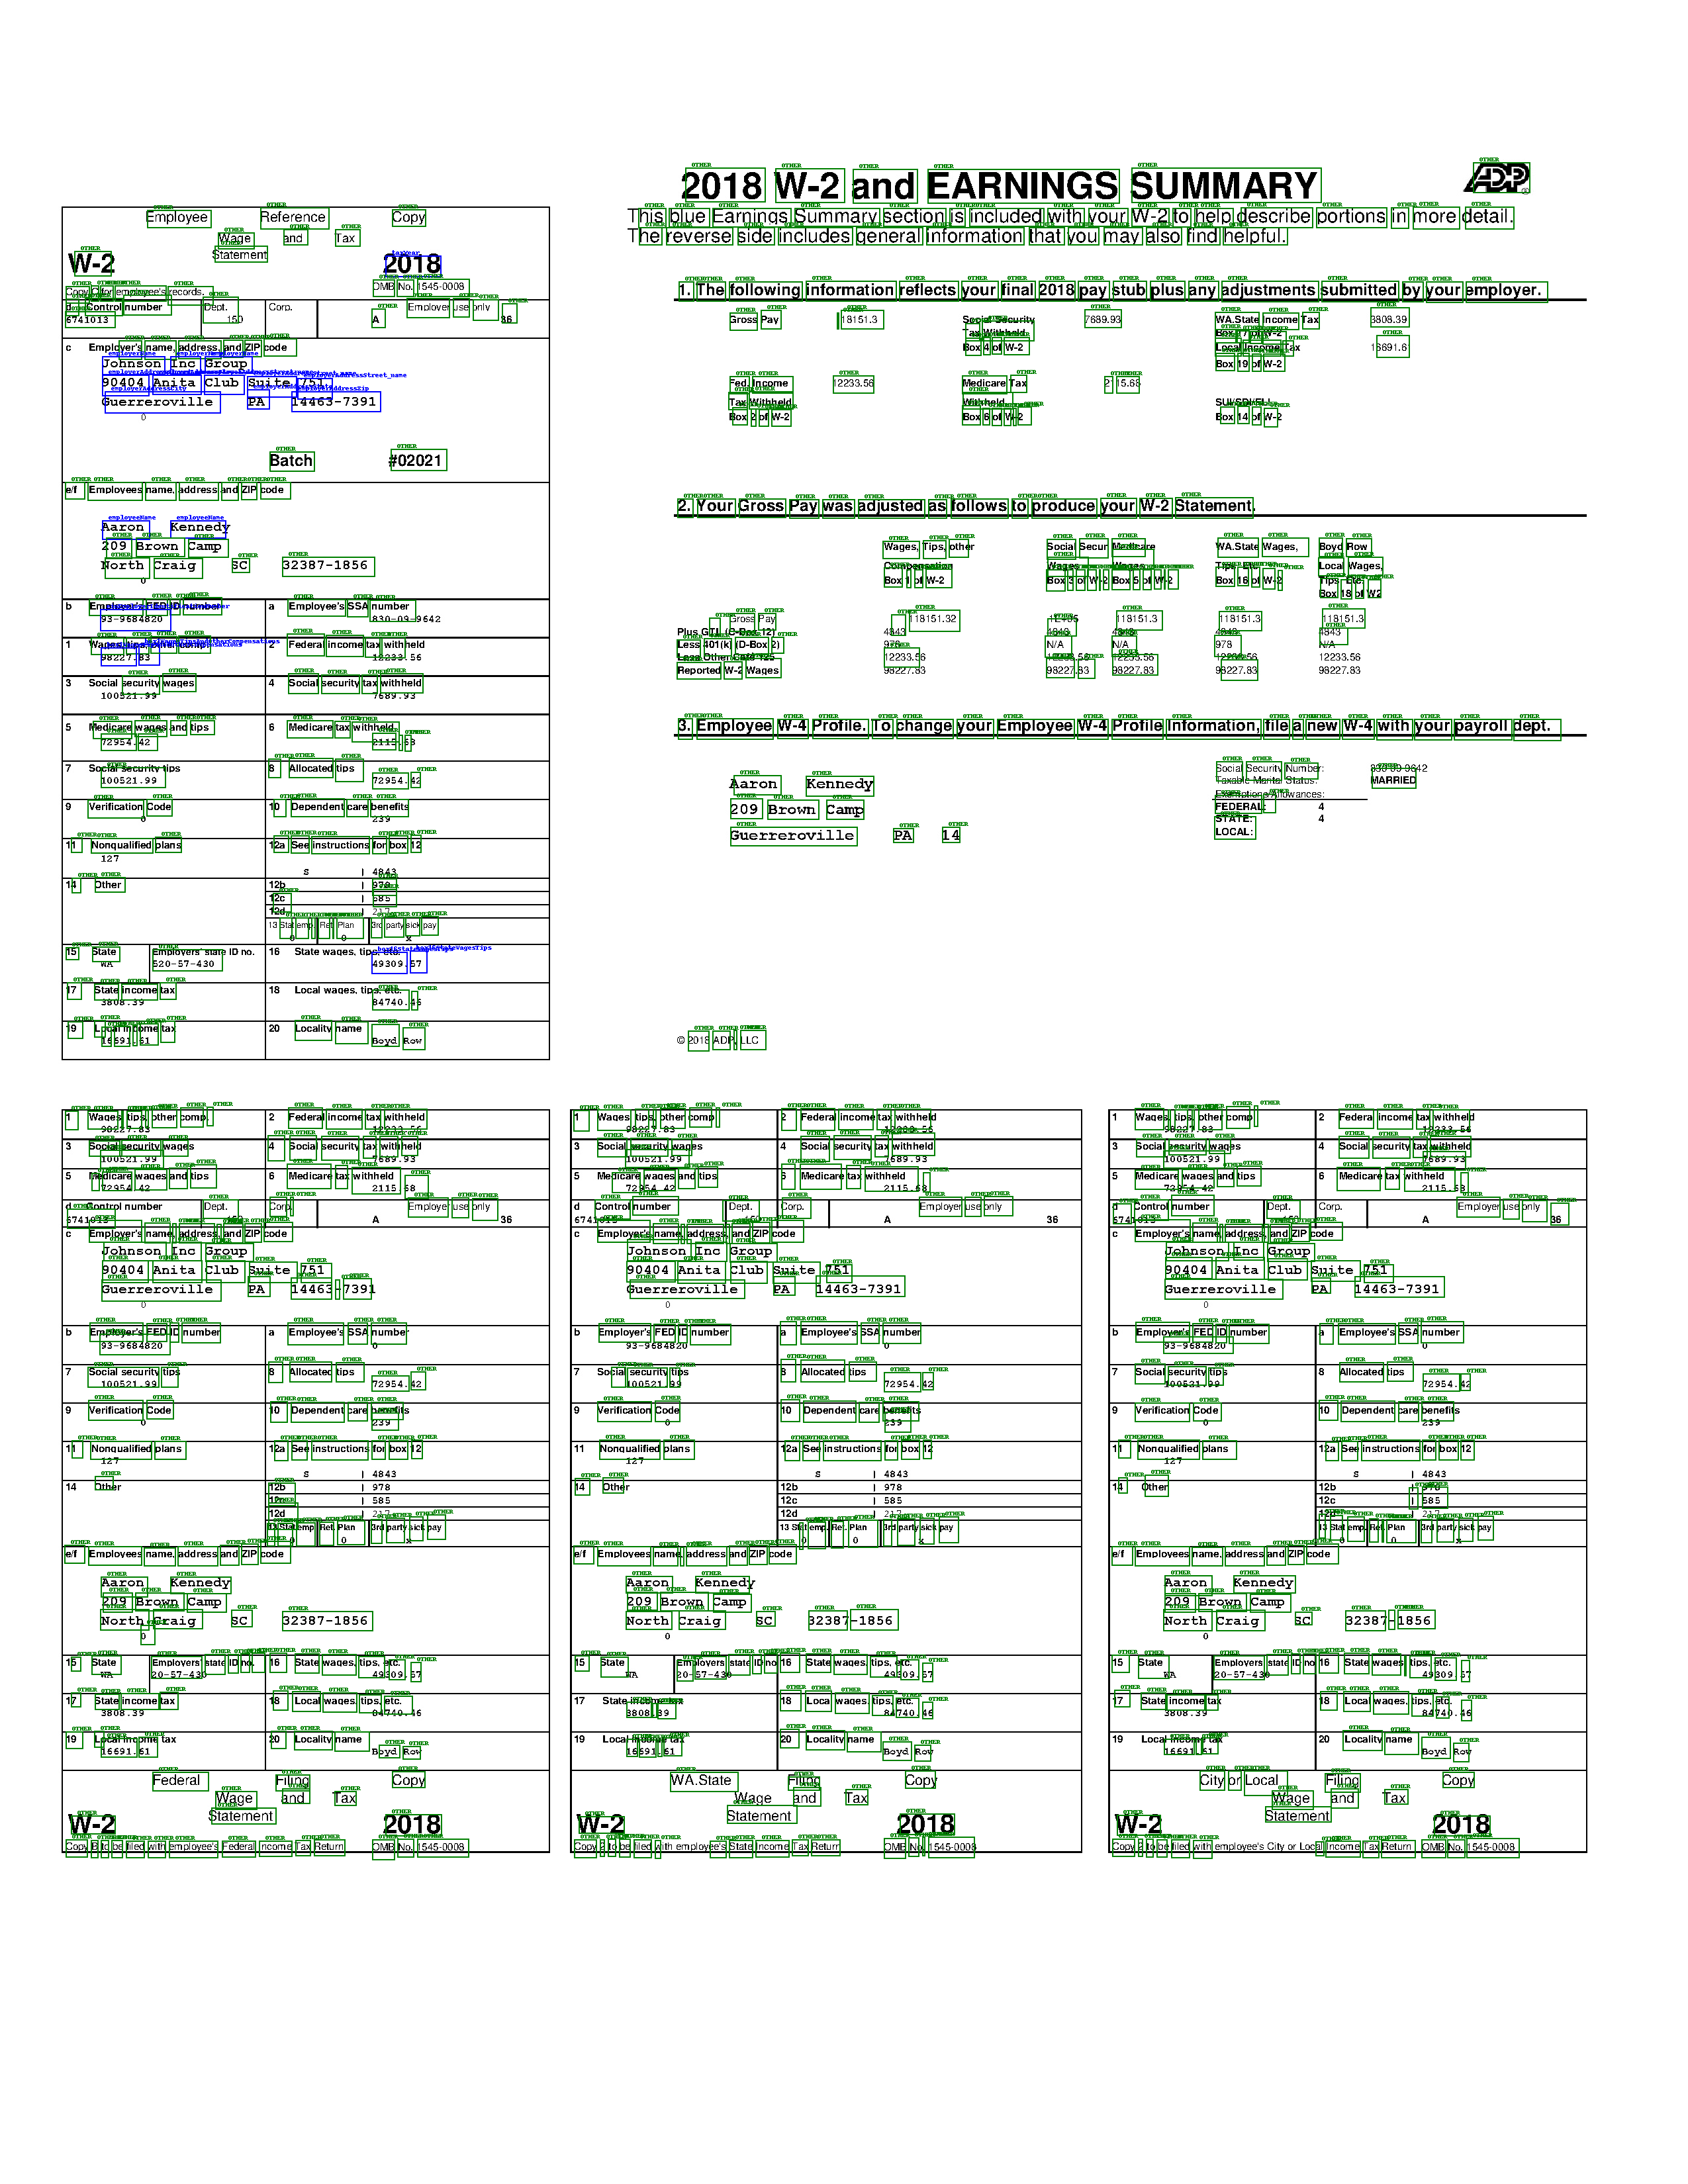

In [ ]:
import cv2
import pytesseract
import numpy as np
from transformers import LayoutLMv2FeatureExtractor, LayoutLMv2Tokenizer, LayoutLMv2Processor
from PIL import Image, ImageDraw, ImageFont

def label_visualization(file_name):
  image = read_img(file_name)
  data_list = read_tsv(file_name)


  feature_extractor = LayoutLMv2FeatureExtractor()
  tokenizer = LayoutLMv2Tokenizer.from_pretrained("microsoft/layoutlmv2-base-uncased")
  processor = LayoutLMv2Processor(feature_extractor, tokenizer)

  draw = ImageDraw.Draw(image, "RGBA")
  font = ImageFont.load_default()

  label2color = {'employerName':"blue",
               'employerAddressStreet_name' : "blue",
               'employerAddressCity': "blue",
               'employerAddressState':"blue",
               'employerAddressZip': "blue",
               'einEmployerIdentificationNumber': "blue",
               'employeeName' : "blue",
               'ssnOfEmployee': "blue",
               'box1WagesTipsAndOtherCompensations' : "blue",
               'box2FederalIncomeTaxWithheld': "blue",
               'box3SocialSecurityWages':"blue",
               'box4SocialSecurityTaxWithheld' : "blue",
               'box16StateWagesTips': "blue",
               'box17StateIncomeTax' : "blue",
               'taxYear':"blue",
               'OTHER':"green"}

  labels = []
  data = []
  for annotation in data_list:
      label = annotation[-1]
      labels.append(label)
      if label in label2color.keys():
        labels.append(label)
      data.append(annotation[0:6])
      general_box = list(annotation[2:6])
      general_box = [int(value) for value in general_box]

      
      draw.rectangle(general_box, outline=label2color[label], width=2)
      draw.text((general_box[0] + 10, general_box[1] - 10), label, fill=label2color[label], font=font)
      words = general_box
      draw.rectangle(words, outline=label2color[label], width=1)

  return image,data,labels
label_visualization('0e997ed9-76ba-4124-ac89-38e870352902_document-3_page-1.tsv').show()

/usr/local/lib/python3.10/dist-packages/transformers/models/layoutlmv2/feature_extraction_layoutlmv2.py:30: FutureWarning: The class LayoutLMv2FeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use LayoutLMv2ImageProcessor instead.
  warnings.warn(


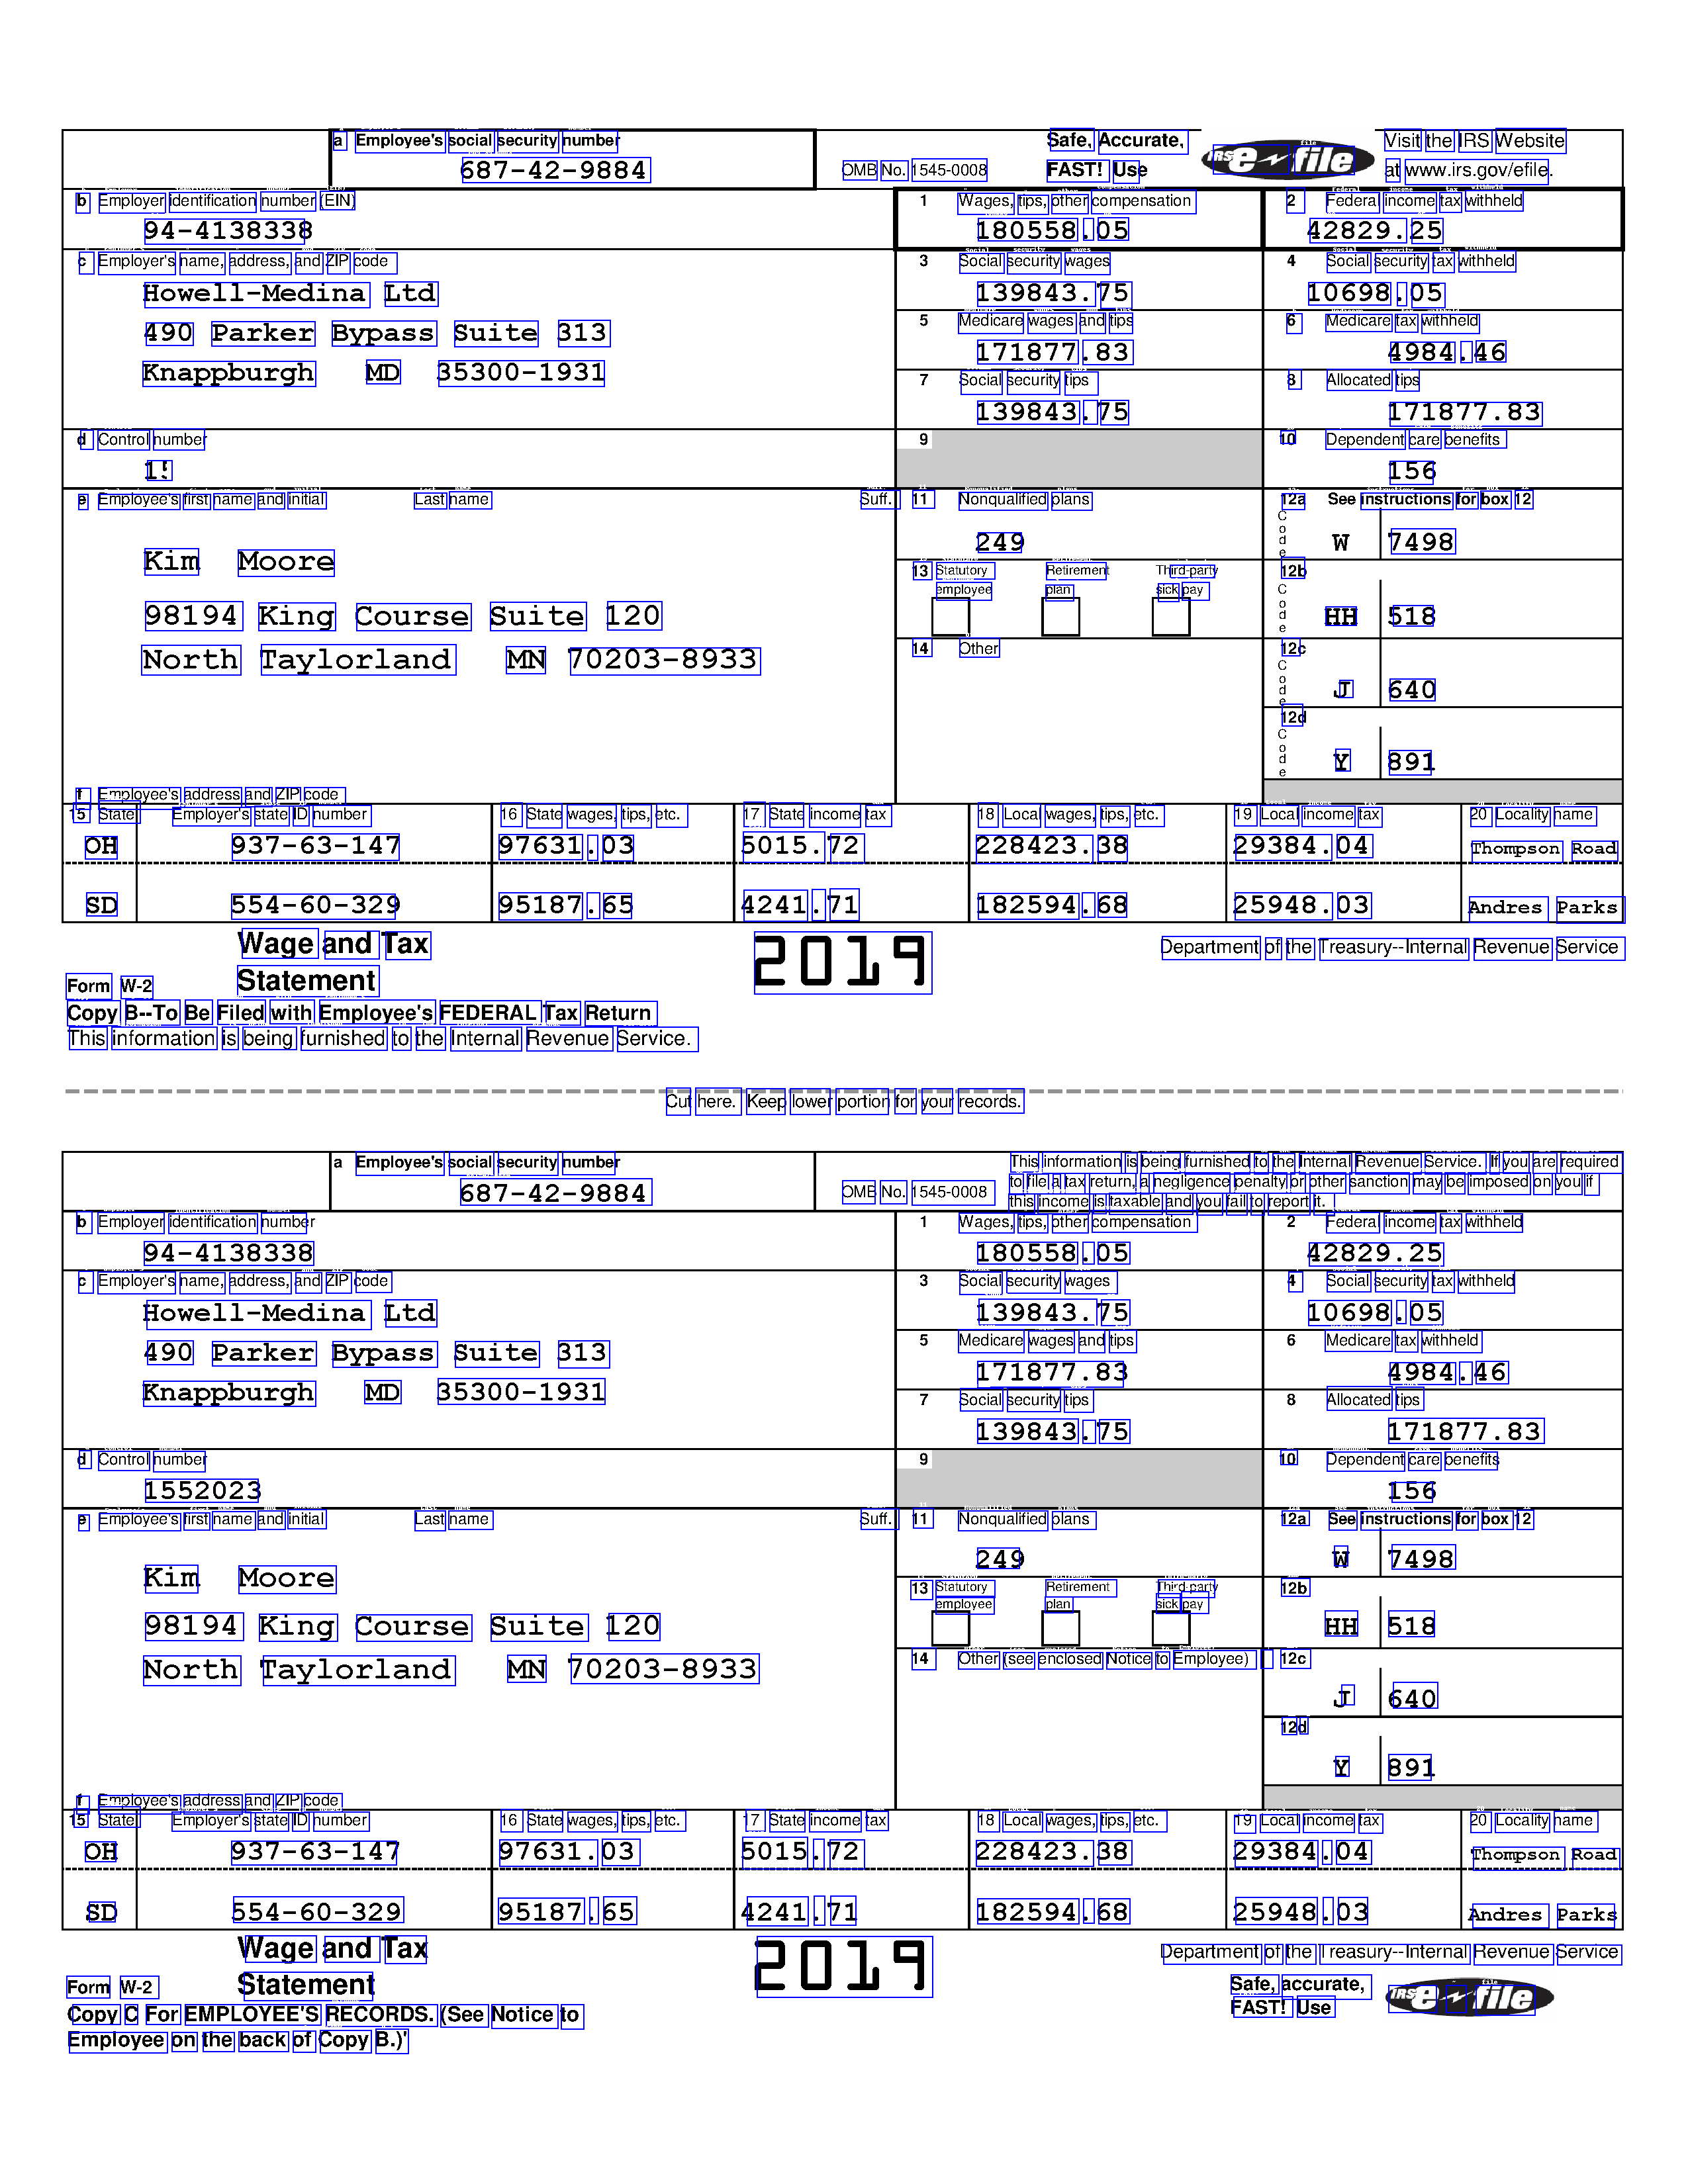

In [ ]:
import cv2
import pytesseract
import numpy as np
from transformers import LayoutLMv2FeatureExtractor, LayoutLMv2Tokenizer, LayoutLMv2Processor
from PIL import Image, ImageDraw, ImageFont

def val_visualization(file_name):
  image = test_img(file_name)
  data_list = val_tsv(file_name)

  feature_extractor = LayoutLMv2FeatureExtractor()
  tokenizer = LayoutLMv2Tokenizer.from_pretrained("microsoft/layoutlmv2-base-uncased")
  processor = LayoutLMv2Processor(feature_extractor, tokenizer)

  draw = ImageDraw.Draw(image, "RGBA")
  font = ImageFont.load_default()

  data = []
  for annotation in data_list:
      data.append(annotation[0:6])
      general_box = list(annotation[2:6])
      general_box = [int(value) for value in general_box]
      text = annotation[-1]
      draw.rectangle(general_box, outline="blue", width=2)
      draw.text((general_box[0] + 10, general_box[1] - 10),text,fill=None, font=font)
      words = general_box
      draw.rectangle(words, outline = "blue", width=1)

  return image,data
val_visualization('0d611bad-b2fe-4cf8-a634-cc5a1a79bf57_document-2_page-1.tsv').show()

In [ ]:
import os
from PIL import Image, ImageDraw, ImageFont
import numpy as np


image_path_folder = '/content/drive/MyDrive/dataset_2/dataset/train/boxes_transcripts_labels'
file_name = os.listdir(image_path_folder)

list_of_labels= {'OTHER':0,
               'employerName':1,
               'employerAddressStreet_name' : 2,
               'employerAddressCity': 3,
               'employerAddressState':4,
               'employerAddressZip': 5,
               'einEmployerIdentificationNumber': 6,
               'employeeName' : 7,
               'ssnOfEmployee': 8,
               'box1WagesTipsAndOtherCompensations' : 9,
               'box2FederalIncomeTaxWithheld': 10,
               'box3SocialSecurityWages':11,
               'box4SocialSecurityTaxWithheld' : 12,
               'box16StateWagesTips': 13,
               'box17StateIncomeTax' : 14,
               'taxYear':15,}

result = []
for file in file_name:
  hm = []
  image,data,labels = label_visualization(file)
  image = np.array(image)
  label_num = [list_of_labels[label] for label in labels]

  hm.append(image)
  hm.append(data)
  hm.extend(label_num)
  result.append(hm)
print(result[0])

In [ ]:
import csv
file_path = '/content/drive/MyDrive/data.csv'  

column_headings = ["image_data",
                   "co-ordinates",
                   'employerName',
                   'employerAddressStreet_name',
                   'employerAddressCity',
                   'employerAddressState',
                   'employerAddressZip',
                   'einEmployerIdentificationNumber',
                   'employeeName',
                   'ssnOfEmployee',
                   'box1WagesTipsAndOtherCompensations',
                   'box2FederalIncomeTaxWithheld',
                   'box3SocialSecurityWages',
                   'box4SocialSecurityTaxWithheld',
                   'box16StateWagesTips',
                   'box17StateIncomeTax',
                   'taxYear',
                   'OTHER']

with open(file_path, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(column_headings)
    for row in result:
        writer.writerow(row)

print("CSV file has been written successfully.")
  



In [ ]:
import os
from PIL import Image, ImageDraw, ImageFont
import numpy as np

val_path = '/content/drive/MyDrive/dataset_2/dataset/val/boxes_transcripts'
file_name = os.listdir(val_path)

result = []
for file in file_name:
  hm = []
  image,data = val_visualization(file)
  image = np.array(image)
  
  hm.append(image)
  hm.append(data)
  result.append(hm)
print(result[0])

In [ ]:
import csv
file_path = '/content/drive/MyDrive/val_data.csv'  
column_headings = ['image','coordinates']
with open(file_path, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(column_headings)
    for row in result:
        writer.writerow(row)

print("CSV file has been written successfully.")
  

CSV file has been written successfully.
